In [1]:
%pylab inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import cmocean.cm as cmo
from matplotlib.patches import Polygon

Populating the interactive namespace from numpy and matplotlib


In [51]:
savefig = True
figext = '.pdf'
datadir = '/Users/erik/Desktop/'

def savefig(fignum, figext=figext, savefig=savefig):
    figname = 'Fig%s%s' % (fignum, figext)
    if savefig:
        plt.savefig(figname)

In [5]:
Bhr = xr.open_dataset(datadir+'GEBCO_ONE/GRIDONE_2D.nc').elevation
res = 0.25  # interpolate to lower-res to save time and reduce filesize in plotting
new_lon = np.arange(Bhr.lon[0], Bhr.lon[-1], res)
new_lat = np.arange(Bhr.lat[0], Bhr.lat[-1], res)

B = Bhr.interp(lat=new_lat, lon=new_lon)

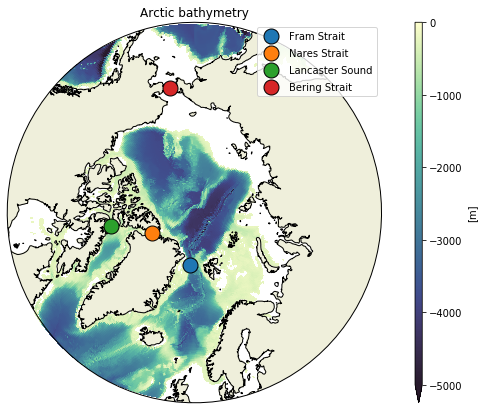

In [54]:
fignum = '07_01'

projection = cartopy.crs.NorthPolarStereo()
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(12, 7))
ax.coastlines(resolution='50m', zorder=3)
ax.add_feature(cartopy.feature.LAND, zorder=2)

a = B.sel(lat=slice(55, 90)).where(B < -200).plot(cmap=cmo.deep_r, add_colorbar=False, vmin=-5000, vmax=0, 
                                                  transform=cartopy.crs.PlateCarree(), rasterized=True)

lats = [80, 81, 74, 66]
lons = [-4, -64, -81, -169]
names = ['Fram Strait', 'Nares Strait', 'Lancaster Sound', 'Bering Strait']
for i in range(len(lons)):
    ax.plot(lons[i], lats[i], 'o', markersize=15, markeredgecolor='k', label=names[i],
            color='C%d' %i, transform=cartopy.crs.PlateCarree(), zorder=4)
ax.set_extent([-180, 180, 54.5, 90], cartopy.crs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
ax.legend(labelspacing=0.7)

plt.title('Arctic bathymetry')
plt.colorbar(a, ax=ax, aspect=50, extend='min', label='[m]')

savefig(fignum)

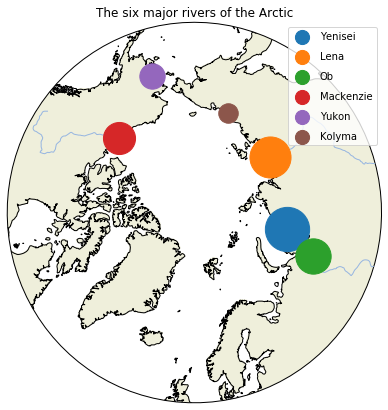

In [45]:
fignum = '07_02'

projection = cartopy.crs.NorthPolarStereo()
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(12, 7))
ax.coastlines(resolution='50m', zorder=3)
ax.add_feature(cartopy.feature.RIVERS, zorder=3)
ax.add_feature(cartopy.feature.LAND, zorder=2)

lats = [72, 72, 66, 70, 63, 70]
lons = [80, 126, 70, -135, -163, 161]
discharge = [19.6, 16.871, 12.475, 10.300, 6.428, 3.800]
names = ['Yenisei', 'Lena', 'Ob', 'Mackenzie', 'Yukon', 'Kolyma']
for i in range(len(lons)):
    ax.scatter(lons[i], lats[i], s=discharge[i]*100, label=names[i],
            color='C%d' %i, transform=cartopy.crs.PlateCarree(), zorder=4)
ax.set_extent([-180, 180, 54.5, 90], cartopy.crs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
lgnd = ax.legend(labelspacing=1)
for h in lgnd.legendHandles:
    h._sizes = [200]

plt.title('The six major rivers of the Arctic')

savefig(fignum)

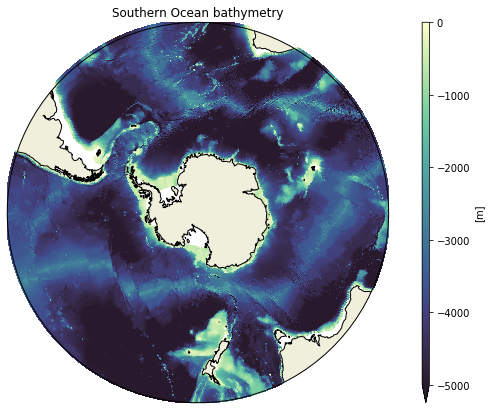

In [52]:
fignum = '08_03'

projection = cartopy.crs.SouthPolarStereo()
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(12, 7))
ax.coastlines(resolution='50m', zorder=3)
ax.add_feature(cartopy.feature.LAND, zorder=2)

a = B.sel(lat=slice(-90, -30)).where(B < -200).plot(cmap=cmo.deep_r, add_colorbar=False, vmin=-5000, vmax=0, 
                                                  transform=cartopy.crs.PlateCarree(), rasterized=True)

# lats = [80, 81, 74, 66]
# lons = [-4, -64, -81, -169]
# names = ['Fram Strait', 'Nares Strait', 'Lancaster Sound', 'Bering Strait']
# for i in range(len(lons)):
#     ax.plot(lons[i], lats[i], 'o', markersize=15, markeredgecolor='k', label=names[i],
#             color='C%d' %i, transform=cartopy.crs.PlateCarree(), zorder=4)
ax.set_extent([-180, 180, -90, -30], cartopy.crs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# ax.legend(labelspacing=0.7)

plt.title('Southern Ocean bathymetry')
plt.colorbar(a, ax=ax, aspect=50, extend='min', label='[m]')

savefig(fignum)

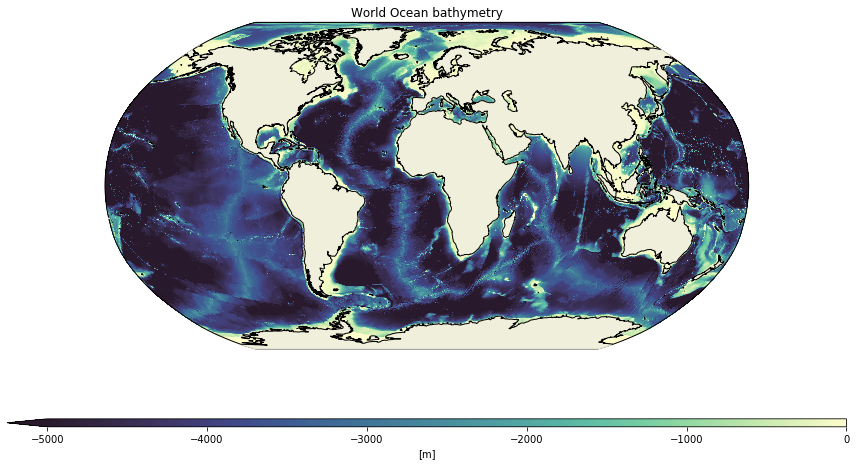

In [53]:
fignum = '09_01'

projection = cartopy.crs.Robinson()
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(12, 7))
ax.coastlines(resolution='50m', zorder=11)
ax.add_feature(cartopy.feature.LAND, zorder=10)

a = B.plot(cmap=cmo.deep_r, add_colorbar=False, transform=cartopy.crs.PlateCarree(), 
           vmin=-5000, vmax=0, rasterized=True)

plt.title('World Ocean bathymetry')
plt.colorbar(a, ax=ax, orientation="horizontal", aspect=100, extend='min', label='[m]')

plt.tight_layout()
savefig(fignum)